In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml("mnist_784", data_home="./dataset/mnist", return_X_y=True)

print(X.shape)

/home/syauri/Desktop/python/coba/env/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)


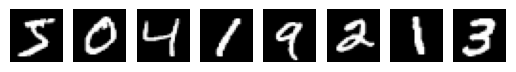

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

pos = 1

for data in np.array(X[:8]):
    plt.subplot(1, 8, pos)
    plt.imshow(data.reshape((28,28)),
               cmap=cm.Greys_r)
    plt.axis("off")
    pos += 1

plt.show()

In [3]:
print(y[:8])

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


# Split into train and test dataset

In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test , y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.2,
                                                     random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(56000, 784)
(56000,)
(14000, 784)
(14000,)


# Classification dengan SVC (Support Vector Classifier)

In [58]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)

SVC(random_state=0)

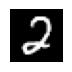

Prediksi: 2


In [19]:
import joblib

random = np.random.randint(1,50)

X_test_new = X_test[:random]

new_model = joblib.load("numberMNIST_svc_model.pth")

y_pred = new_model.predict(X_test_new[random-1:random])

pos = 1

for data in np.array(X_test_new[random-1:random]):
    plt.subplot(1, 8, pos)
    plt.imshow(data.reshape((28,28)),
               cmap=cm.Greys_r)
    plt.axis("off")
    pos += 1

plt.show()

real_data = np.array(y_test[random-1:random])

print(f"Prediksi: {y_pred[0]}")
# print(f"Real data: {real_data[0]}")


# Save and Load Model

In [ ]:
import joblib

# Save model number MNIST
file = "numberMNIST_svc_model.pth"
joblib.dump(model, file)

# Load Model 
load_model = joblib.load(file)

X_test_new = X[:1]

y_pred_new = load_model.predict(X_test_new)